# **Deep learning for tabular data applied to AirQuality.csv Dataset**
------
| Variable         | Description                                                                                         |
|------------------|-----------------------------------------------------------------------------------------------------|
| CO(GT)           | Concentration of carbon monoxide in the air (in µg/m³).                                             |
| PT08.S1(CO)      | Carbon monoxide (CO) sensor in the air (first generation) - Normalized response.                    |
| NMHC(GT)         | Concentration of non-methane hydrocarbons in the air (in µg/m³).                                    |
| C6H6(GT)         | Concentration of benzene in the air (in µg/m³).                                                     |
| PT08.S2(NMHC)    | Non-methane hydrocarbons (NMHC) sensor in the air (second generation) - Normalized response.        |
| NOx(GT)          | Concentration of nitrogen oxides in the air (in µg/m³).                                             |
| PT08.S3(NOx)     | Nitrogen oxides (NOx) sensor in the air (third generation) - Normalized response.                   |
| NO2(GT)          | Concentration of nitrogen dioxide in the air (in µg/m³).                                            |
| PT08.S4(NO2)     | Nitrogen dioxide (NO2) sensor in the air (fourth generation) - Normalized response.                 |
| PT08.S5(O3)      | Ozone (O3) sensor in the air (fifth generation) - Normalized response.                              |
| T                | Temperature (in °C).                                                                                |
| RH               | Relative humidity (in %).                                                                           |
| AH               | Absolute humidity (in g/m³).                                                                        |



In [1]:
from sklearn.model_selection import train_test_split as tts
import pandas as pd

In [2]:
data = pd.read_csv("DataSet/AirQuality.csv", sep=";", decimal=',') # Read the file
data = data.dropna(how="all").dropna(axis=1, how='all') # clean empty columns and rows

## Give a data standard

In [3]:
# Estandarizar el formato de fecha
data["DateTime"] = data['Date'] + ' ' + data['Time']
data["DateTime"] = pd.to_datetime(data["DateTime"], format="%d/%m/%Y %H.%M.%S")
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Timestamp
data["datetimestamp"] = (data['DateTime'] - pd.Timestamp("1970-01-01 00:00:00")) // pd.Timedelta('1s')

In [4]:
pd.to_datetime(data["datetimestamp"][0], unit="s") # ejemplo de como obtener la fecha de nuevo

Timestamp('2004-03-10 18:00:00')

# Clean the data
There are a lot of problems, nmhc has a lot of -200 values maybe is a 

## Remove -200 values (its extreeeeeeeeme)

In [5]:
def remove200(data):
  filter_cols = [col for col in data.columns if col not in ['DateTime', 'datetimestamp']]
  filtered_data = data[~(data[filter_cols] == -200).any(axis=1)]

  return filtered_data

In [6]:
dataFull = data
dataFull.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,datetimestamp
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357,9.357000e+03
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004-09-21 16:00:00,1.095782e+09
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004-03-10 18:00:00,1.078942e+09
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004-06-16 05:00:00,1.087362e+09
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004-09-21 16:00:00,1.095782e+09
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00,1.104203e+09
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00,1.112623e+09
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,9.724599e+06


In [7]:
dataWnmhc = data.drop(columns=['NMHC(GT)'])
dataWnmhc = remove200(dataWnmhc)
dataWnmhc.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,datetimestamp
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941,6.941000e+03
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573,2004-09-28 01:45:40.066272896,1.096336e+09
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00,1.078942e+09
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100,2004-06-15 05:00:00,1.087276e+09
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900,2004-10-08 05:00:00,1.097212e+09
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600,2005-01-12 18:00:00,1.105553e+09
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600,2005-04-04 14:00:00,1.112623e+09
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097,NaN,1.020957e+07


In [8]:
dataClean = data
dataClean = remove200(data)
dataClean.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,datetimestamp
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827,8.270000e+02
mean,2.353567,1207.879081,231.025393,10.771100,966.116082,143.501814,963.297461,100.259976,1600.620314,1045.812576,15.601451,49.050181,0.831853,2004-04-04 14:58:02.466747264,1.081091e+09
min,0.300000,753.000000,7.000000,0.500000,448.000000,12.000000,461.000000,19.000000,955.000000,263.000000,6.300000,14.900000,0.402300,2004-03-10 18:00:00,1.078942e+09
25%,1.300000,1017.000000,77.000000,4.800000,754.000000,81.000000,769.000000,78.500000,1369.500000,760.000000,11.900000,36.700000,0.718950,2004-03-24 11:30:00,1.080128e+09
50%,2.000000,1172.000000,157.000000,9.100000,944.000000,128.000000,920.000000,99.000000,1556.000000,1009.000000,15.000000,49.600000,0.817700,2004-04-02 18:00:00,1.080929e+09
75%,3.100000,1380.000000,318.500000,14.800000,1142.500000,187.000000,1131.000000,122.000000,1783.500000,1320.000000,18.300000,60.550000,0.927500,2004-04-15 16:30:00,1.082047e+09
max,8.100000,2040.000000,1189.000000,39.200000,1754.000000,478.000000,1935.000000,196.000000,2679.000000,2359.000000,30.000000,83.200000,1.485200,2004-05-01 00:00:00,1.083370e+09
std,1.409496,241.816997,208.461912,7.418134,266.424557,81.829717,265.914168,31.493823,302.291793,400.134662,4.825304,15.266746,0.178506,NaN,1.317737e+06


## Remove Outliers

In [9]:
from scipy import stats

def cleanZscores (df: pd.DataFrame, mayor: int, menor: int) -> pd.DataFrame :
  df = df.drop(columns=['DateTime']) # eliminar temporalmente DateTime
  outliers_count = {}
  rows_before = df.shape[0]
  for column in df.columns:
    z_scores = stats.zscore(df[column])
    outliers = (z_scores > 3) | (z_scores < -3)
    outliers_count[column] = sum(outliers)
    df = df[~outliers]
  rows_after = df.shape[0]
  rows_removed = rows_before - rows_after
  print("Número de puntos atípicos por variable:", outliers_count)
  print(f"Renglones eliminados: {rows_removed}")
  return df

In [10]:
dataWnmhc = cleanZscores(dataWnmhc, 3, -3)
dataClean = cleanZscores(dataClean, 3, -3)
dataFull = cleanZscores(data, 3, -3)

Número de puntos atípicos por variable: {'CO(GT)': 87, 'PT08.S1(CO)': 27, 'C6H6(GT)': 53, 'PT08.S2(NMHC)': 0, 'NOx(GT)': 110, 'PT08.S3(NOx)': 88, 'NO2(GT)': 35, 'PT08.S4(NO2)': 6, 'PT08.S5(O3)': 12, 'T': 0, 'RH': 0, 'AH': 0, 'datetimestamp': 0}
Renglones eliminados: 418
Número de puntos atípicos por variable: {'CO(GT)': 10, 'PT08.S1(CO)': 3, 'NMHC(GT)': 10, 'C6H6(GT)': 2, 'PT08.S2(NMHC)': 0, 'NOx(GT)': 2, 'PT08.S3(NOx)': 8, 'NO2(GT)': 1, 'PT08.S4(NO2)': 1, 'PT08.S5(O3)': 0, 'T': 0, 'RH': 0, 'AH': 6, 'datetimestamp': 0}
Renglones eliminados: 43
Número de puntos atípicos por variable: {'CO(GT)': 0, 'PT08.S1(CO)': 367, 'NMHC(GT)': 257, 'C6H6(GT)': 120, 'PT08.S2(NMHC)': 0, 'NOx(GT)': 76, 'PT08.S3(NOx)': 108, 'NO2(GT)': 0, 'PT08.S4(NO2)': 13, 'PT08.S5(O3)': 25, 'T': 0, 'RH': 0, 'AH': 0, 'datetimestamp': 0}
Renglones eliminados: 966


In [11]:
dataWnmhc = dataWnmhc.join(data["DateTime"]) # reintegrar DateTime (Si es util)
dataClean = dataClean.join(data['DateTime'])
dataFull = dataFull.join(data['DateTime'])

## Create CSV files
The file is useful to some libraries like tianto and IGTD

In [12]:
dataWnmhc.to_csv("DataSet/dataWnmhc.csv", index=False)
dataClean.to_csv("DataSet/dataClean.csv", index=False)
dataFull.to_csv("DataSet/dataFull.csv", index=False)
data.to_csv("DataSet/data.csv", index=False)

# Load Cleaned Data from saved csv
I dont know but maybe it will be better to just load one of them

In [25]:
data = pd.read_csv("DataSet/data.csv")

In [2]:
dataWnmhc = pd.read_csv("DataSet/dataWnmhc.csv")

In [27]:
dataClean = pd.read_csv("DataSet/dataClean.csv")

In [28]:
dataFull = pd.read_csv("DataSet/dataFull.csv")

# View Data

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data_view = dataWnmhc

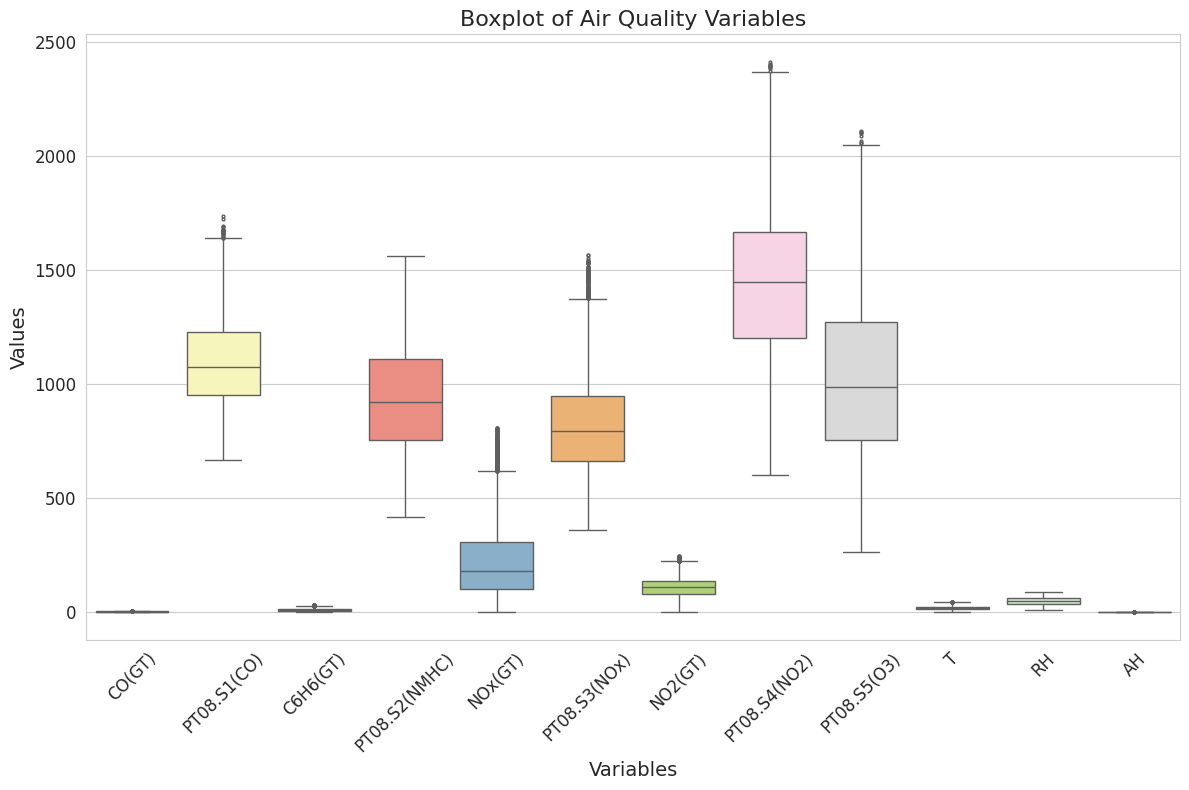

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_view.drop(columns=['DateTime', 'datetimestamp']), palette="Set3", flierprops=dict(markersize=2))
plt.title('Boxplot of Air Quality Variables', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)  # Set y-axis label font size
plt.xlabel('Variables', fontsize=14)  # Set x-axis label font size
plt.ylabel('Values', fontsize=14)  # Set y-axis label font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

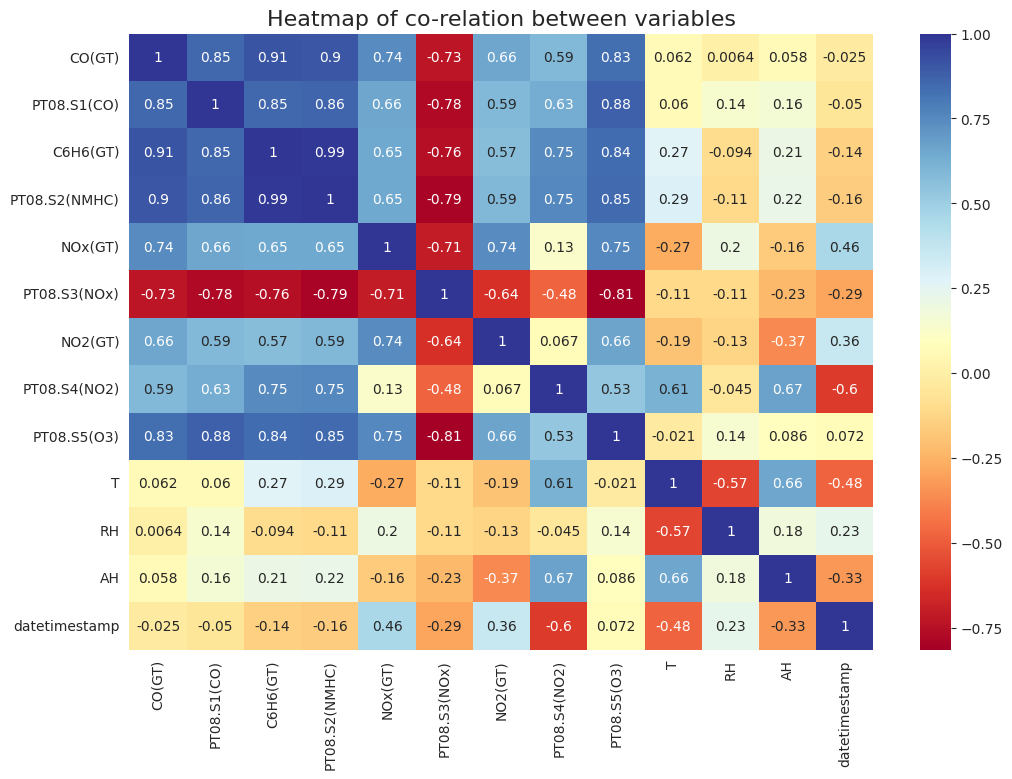

In [22]:
fig, ax = plt.subplots(figsize=(12,8 ))
sns.heatmap(data_view.drop(columns=['DateTime']).corr(), cmap = "RdYlBu", annot=True)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# Train Test Validation Split

In [3]:
X = dataWnmhc[["AH", "RH", "T", "datetimestamp", 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)']]
y = dataWnmhc[["CO(GT)"]]

In [4]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.25)

# Scale a bit

In [5]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_standard = standard.fit_transform(X_train)
y_train_standard = standard.fit_transform(y_train)
X_test_standard = standard.fit_transform(X_test)
y_test_standard = standard.fit_transform(y_test)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
y_train_poly = poly.fit_transform(y_train)
X_test_poly = poly.fit_transform(X_test)
y_test_poly = poly.fit_transform(y_test)

# Regressions

In [6]:
# Save the results
results = pd.DataFrame(columns=['Model', 'mse', 'mae', 'rmse', 'mape', 'r2'])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [7]:
def appendError(model, testy, y_pred):
    model_name = str(type(model).__name__)
    mse = mean_squared_error(testy, y_pred)
    mae = mean_absolute_error(testy, y_pred)
    rmse = root_mean_squared_error(testy, y_pred)
    mape = mean_absolute_percentage_error(testy, y_pred)
    r2 = r2_score(testy, y_pred)
    return pd.DataFrame([{
        'Model': model_name,
        'mse': mse, 
        'mae': mae, 
        'mae': mae, 
        'rmse': rmse, 
        'mape': mape, 
        'r2': r2
    }])

## Linear

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

trainx = X_train_standard
trainy = y_train_standard

testx = X_test_standard
testy = y_test_standard

model.fit(trainx, trainy)

LinearRegression()

In [9]:
y_pred = model.predict(testx)

results = pd.concat([results, appendError(model, testy, y_pred)])

/tmp/ipykernel_10643/2229062687.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, appendError(model, testy, y_pred)])


## Linear (Polynomial)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

trainx = X_train_poly
trainy = y_train_poly

testx = X_test_poly
testy = y_test_poly

model.fit(trainx, trainy)

LinearRegression()

In [11]:
y_pred = model.predict(testx)

results = pd.concat([results, appendError(model, testy, y_pred)])

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

results = pd.concat([results, appendError(model, y_test, y_pred)])

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

results = pd.concat([results, appendError(model, y_test, y_pred)])

## SVR

In [16]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')

model.fit(X_train, y_train.values.ravel())

SVR()

In [17]:
y_pred = model.predict(X_test)

results = pd.concat([results, appendError(model, y_test.values.ravel(), y_pred)])

## KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
y_pred = model.predict(X_test)

results = pd.concat([results, appendError(model, y_test, y_pred)])

# Simple neural networks

In [21]:
import tensorflow as tf

2024-03-28 18:30:08.662538: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 18:30:08.705682: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 18:30:08.705729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 18:30:08.706832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 18:30:08.713467: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 18:30:08.714331: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='sigmoid', input_shape=(X_train.shape[1],)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='selu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_standard, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
107/107 [==============================] - 1s 4ms/step - loss: 1.9459 - val_loss: 5.9715
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 0.6987 - val_loss: 2.5440
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 0.5768 - val_loss: 2.8643
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 0.5102 - val_loss: 2.8562
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.4624 - val_loss: 2.2005
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 0.4286 - val_loss: 2.0609
Epoch 7/50
107/107 [==============================] - 0s 4ms/step - loss: 0.4022 - val_loss: 2.0370
Epoch 8/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3795 - val_loss: 1.6797
Epoch 9/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3634 - val_loss: 1.6716
Epoch 10/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3482 - val_loss: 1.6645

In [23]:
y_pred = model.predict(X_test_standard)

results = pd.concat([results, appendError(model, y_test, y_pred)])

62/62 [==============================] - 0s 1ms/step


In [24]:
results

,Model,mse,mae,rmse,mape,r2
0,LinearRegression,0.123934,0.234331,0.352042,0.874054,0.876066
0,LinearRegression,2.021944,0.534977,0.948398,0.470644,0.909297
0,RandomForestRegressor,0.150312,0.254472,0.387700,0.198414,0.894887
0,DecisionTreeRegressor,0.293337,0.358304,0.541606,0.259989,0.794870
0,SVR,1.486151,0.950058,1.219078,0.773968,-0.039263
0,KNeighborsRegressor,0.935125,0.717445,0.967019,0.556969,0.346069
0,Sequential,0.180881,0.280480,0.425301,0.234488,0.873510


## Keras tuner

In [32]:
import keras
def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],))) # se supone que necesita esto para poder guardar el modelo
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation=hp.Choice("activation", ["relu", "elu", "selu"]),
                                        kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mse'])
    return model

### RandomSearch

In [34]:
from keras_tuner.tuners import RandomSearch
random = RandomSearch (
    build_model,
    objective='mse',
    max_trials=20,
    executions_per_trial=2,
    directory='air',
    project_name='airSearch'
)
random.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'selu'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [36]:
random.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val)
             )

Trial 20 Complete [00h 06m 05s]
mse: nan

Best mse So Far: 1.4237565398216248
Total elapsed time: 01h 14m 00s


In [38]:
model = random.get_best_models(1)[0]
y_pred = model.predict(X_test)

results = pd.concat([results, appendError(model, y_test, y_pred)])

62/62 [==============================] - 0s 4ms/step


### BayesianOptimization

In [41]:
from keras_tuner.tuners import BayesianOptimization
bayesian = BayesianOptimization (
    build_model,
    objective='mse',
    max_trials=20,
    executions_per_trial=2,
    directory='air',
    project_name='airBayesian'
)
bayesian.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val)
             )

Trial 20 Complete [00h 04m 22s]
mse: 664.0157606601715

Best mse So Far: 1.4285118579864502
Total elapsed time: 01h 15m 42s


In [42]:
model = bayesian.get_best_models(1)[0]
y_pred = model.predict(X_test)

results = pd.concat([results, appendError(model, y_test, y_pred)])

62/62 [==============================] - 1s 5ms/step


In [43]:
results

,Model,mse,mae,rmse,mape,r2
0,LinearRegression,0.125148,0.235935,0.353763,0.665943,0.874852
0,LinearRegression,1.893916,0.529378,0.920090,0.467650,0.912609
0,RandomForestRegressor,0.139195,0.251186,0.373088,0.191072,0.901370
0,DecisionTreeRegressor,0.256004,0.333163,0.505968,0.238301,0.818602
0,SVR,1.467341,0.943430,1.211339,0.737554,-0.039719
0,KNeighborsRegressor,0.892726,0.697067,0.944842,0.502456,0.367439
0,Sequential,0.185552,0.286122,0.430758,0.245461,0.868523
0,Sequential,1.413440,0.954629,1.188882,0.821631,-0.001526
0,Sequential,1.413397,0.954670,1.188864,0.821843,-0.001495


### HyperBand

In [46]:
from keras_tuner.tuners import Hyperband
hyperband = Hyperband (
    build_model,
    objective='mse',
    max_epochs=100,
    # executions_per_trial=2,
    directory='air',
    project_name='airHyperband'
)
hyperband.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val)
             )

Trial 226 Complete [00h 01m 40s]
mse: 5.693788528442383

Best mse So Far: 1.42129385471344
Total elapsed time: 01h 25m 14s


In [47]:
model = hyperband.get_best_models(1)[0]
y_pred = model.predict(X_test)

results = pd.concat([results, appendError(model, y_test, y_pred)])

62/62 [==============================] - 0s 3ms/step


In [48]:
results

,Model,mse,mae,rmse,mape,r2
0,LinearRegression,0.125148,0.235935,0.353763,0.665943,0.874852
0,LinearRegression,1.893916,0.529378,0.920090,0.467650,0.912609
0,RandomForestRegressor,0.139195,0.251186,0.373088,0.191072,0.901370
0,DecisionTreeRegressor,0.256004,0.333163,0.505968,0.238301,0.818602
0,SVR,1.467341,0.943430,1.211339,0.737554,-0.039719
0,KNeighborsRegressor,0.892726,0.697067,0.944842,0.502456,0.367439
0,Sequential,0.185552,0.286122,0.430758,0.245461,0.868523
0,Sequential,1.413440,0.954629,1.188882,0.821631,-0.001526
0,Sequential,1.413397,0.954670,1.188864,0.821843,-0.001495
0,Sequential,1.413260,0.954806,1.188806,0.822538,-0.001398
